In [1]:
from qiskit import (QuantumRegister,ClassicalRegister,QuantumCircuit,BasicAer,execute)
from qiskit.visualization import plot_histogram,plot_state_city

In [2]:
qr=QuantumRegister(2)
cr=ClassicalRegister(2)
backend=BasicAer.get_backend('statevector_simulator')

In [3]:
circuit=QuantumCircuit(qr,cr)
circuit.h(0)
circuit.x(1)
circuit.measure([0,1],[0,1])
print(circuit.draw())

      ┌───┐┌─┐   
q0_0: ┤ H ├┤M├───
      ├───┤└╥┘┌─┐
q0_1: ┤ X ├─╫─┤M├
      └───┘ ║ └╥┘
c0: 2/══════╩══╩═
            0  1 


[0.+0.j 0.+0.j 1.+0.j 0.+0.j]


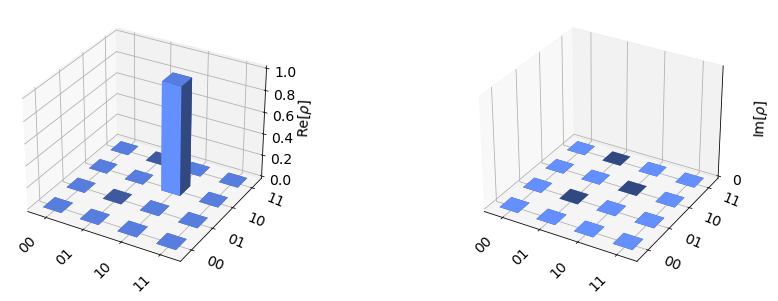

In [4]:
job=execute(circuit,backend)
result=job.result()
print(result.get_statevector(circuit))
plot_state_city(result.get_statevector(circuit))

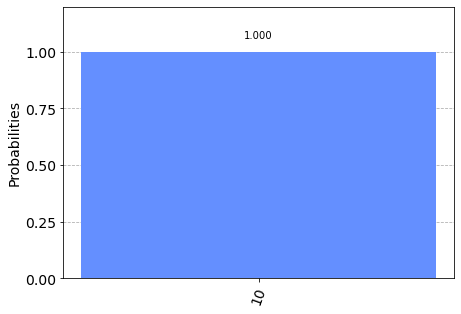

In [5]:
plot_histogram(result.get_counts())

In [6]:
backend1=BasicAer.get_backend('qasm_simulator')
job1=execute(circuit,backend1,shots=10000)
result1=job1.result()

In [7]:
print(result1)
#plot_state_city(result1.get_counts)

Result(backend_name='qasm_simulator', backend_version='2.0.0', qobj_id='d6f073cf-384f-4d23-92ef-fdaffb9d8597', job_id='3dc8b6ab-7754-4091-bb31-5ded5b777172', success=True, results=[ExperimentResult(shots=10000, success=True, meas_level=MeasLevel.CLASSIFIED, data=ExperimentResultData(counts={'0x2': 5015, '0x3': 4985}), header=QobjExperimentHeader(clbit_labels=[['c0', 0], ['c0', 1]], creg_sizes=[['c0', 2]], global_phase=0.0, memory_slots=2, n_qubits=2, name='circuit7', qreg_sizes=[['q0', 2]], qubit_labels=[['q0', 0], ['q0', 1]]), status=DONE, name='circuit7', seed_simulator=1307195787, time_taken=0.028035402297973633)], status=COMPLETED, status=QobjHeader(backend_name='qasm_simulator', backend_version='2.0.0'), time_taken=0.028035402297973633)


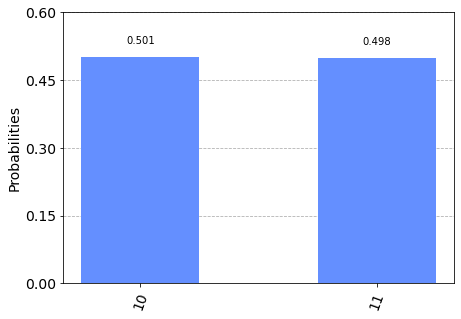

In [8]:
plot_histogram(result1.get_counts())